# 1. Baseball Database

The [Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/) has an sqlite version. Download it for these exercises. 

**1.1** Which player has had the most homeruns? List top 25 players and provide their first and last names

**1.2** Which team historically has paid the highest salary on average? Your query should only output teams whose average salary is above $1M. If average salary is formatted as scientific notation, convert it to numbers, i.e. 4.291454e+06 =  4291453

**1.3** Which team has the most players in the Hall of Fame? 

**1.4** Is there a relation between how many homeruns a player has made in a year and their salary that year? Pull Player's name, ID, Year, Salary and homeruns together in a single query. 

**1.5 (BONUS)** Find all birth year that appears in the people table consecutively at least three times.

In [36]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1.1 Which player has had the most homeruns? List top 25 players and provide their first and last names
batting = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/my_data/baseballdatabank-master/baseballdatabank-master/core/Batting.csv")
pitching = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/my_data/baseballdatabank-master/baseballdatabank-master/core/Pitching.csv")
people = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/my_data/baseballdatabank-master/baseballdatabank-master/core/People.csv")
conn = sqlite3.connect("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/my_data/lahmansbaseballdb.sqlite")
c = conn.cursor()

In [3]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'",conn)

,name
0,allstarfull
1,appearances
2,awardsmanagers
3,awardsplayers
4,awardssharemanagers
5,awardsshareplayers
6,batting
7,battingpost
8,collegeplaying
9,divisions


In [4]:
batting_df = pd.read_sql("""SELECT * FROM batting""", conn)
batting_df

,ID,playerID,yearID,stint,teamID,team_ID,lgID,G,G_batting,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1,abercda01,1871,1,TRO,8,NA,1,None,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,2,addybo01,1871,1,RC1,7,NA,25,None,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,3,allisar01,1871,1,CL1,3,NA,29,None,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,4,allisdo01,1871,1,WS3,9,NA,27,None,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,5,ansonca01,1871,1,RC1,7,NA,25,None,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,107425,zimmejo02,2019,1,DET,2905,AL,23,None,2,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,107426,zimmeky01,2019,1,KCA,2907,AL,15,None,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,107427,zimmery01,2019,1,WAS,2925,NL,52,None,171,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,107428,zobribe01,2019,1,CHN,2901,NL,47,None,150,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [5]:
batting_df.columns

Index(['ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G',
       'G_batting', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [6]:
pitching_df = pd.read_sql("""SELECT * FROM pitching""", conn)
pitching_df

,ID,playerID,yearID,stint,teamID,team_ID,lgID,W,L,G,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1,bechtge01,1871,1,PH1,6,NA,1,2,3,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,2,brainas01,1871,1,WS3,9,NA,12,15,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,3,fergubo01,1871,1,NY2,5,NA,0,0,1,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,4,fishech01,1871,1,RC1,7,NA,4,16,24,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,5,fleetfr01,1871,1,NY2,5,NA,0,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,47624,zamorda01,2019,1,NYN,2914,NL,0,1,17,...,1.0,0,1.0,0,41.0,3,5,0.0,1.0,0.0
47624,47625,zeuchtj01,2019,1,TOR,2924,AL,1,2,5,...,0.0,2,0.0,0,99.0,0,13,0.0,0.0,1.0
47625,47626,zimmejo02,2019,1,DET,2905,AL,1,13,23,...,2.0,3,6.0,0,504.0,0,89,3.0,4.0,5.0
47626,47627,zimmeky01,2019,1,KCA,2907,AL,0,1,15,...,0.0,2,0.0,0,102.0,3,22,0.0,0.0,1.0


In [7]:
pitching_df.columns

Index(['ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'W',
       'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB',
       'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [8]:
people_df = pd.read_sql("""SELECT * FROM people""", conn)
people_df

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,birth_date,debut_date,finalgame_date,death_date
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,1981-12-27,2004-04-06,2015-08-23,None
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,1934-02-05,1954-04-13,1976-10-03,None
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1939-08-05,1962-04-10,1971-09-26,1984-08-16
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,R,R,1977-07-26,1990-10-03,aased001,aasedo01,1954-09-08,1977-07-26,1990-10-03,None
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,L,L,2001-09-10,2006-04-13,abada001,abadan01,1972-08-25,2001-09-10,2006-04-13,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19873,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,L,R,1957-07-01,1961-05-09,zupof101,zupofr01,1939-08-29,1957-07-01,1961-05-09,2005-03-25
19874,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01,1958-10-31,1982-09-04,1991-05-02,None
19875,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1924-08-20,1951-04-21,1959-06-15,2014-09-08
19876,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01,1888-11-02,1910-08-14,1916-07-12,1978-03-27


In [9]:
people_df.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID', 'birth_date', 'debut_date', 'finalgame_date',
       'death_date'],
      dtype='object')

In [10]:
homeruns = pd.read_sql("""SELECT a.nameFirst AS 'first_name', a.nameLast AS 'last_name', b.HR AS homeruns
                FROM people a
                LEFT JOIN batting b
                ON a.playerID = b.playerID
                ORDER BY b.HR DESC LIMIT 25""", conn)
homeruns

,first_name,last_name,homeruns
0,Barry,Bonds,73
1,Mark,McGwire,70
2,Sammy,Sosa,66
3,Mark,McGwire,65
4,Sammy,Sosa,64
5,Sammy,Sosa,63
6,Roger,Maris,61
7,Babe,Ruth,60
8,Babe,Ruth,59
9,Giancarlo,Stanton,59


In [11]:
# 1.2 Which team historically has paid the highest salary on average? Your query should only output teams whose average salary 
# is above $1M. If average salary is formatted as scientific notation, convert it to numbers, i.e. 4.291454e+06 = 4291453
pd.read_sql("""SELECT * FROM Salaries""", conn)

,ID,yearID,teamID,team_ID,lgID,playerID,salary
0,1,1985,ATL,1918,NL,barkele01,870000.0
1,2,1985,ATL,1918,NL,bedrost01,550000.0
2,3,1985,ATL,1918,NL,benedbr01,545000.0
3,4,1985,ATL,1918,NL,campri01,633333.0
4,5,1985,ATL,1918,NL,ceronri01,625000.0
...,...,...,...,...,...,...,...
26423,26424,2016,WAS,2835,NL,strasst01,10400000.0
26424,26425,2016,WAS,2835,NL,taylomi02,524000.0
26425,26426,2016,WAS,2835,NL,treinbl01,524900.0
26426,26427,2016,WAS,2835,NL,werthja01,21733615.0


In [12]:
pd.read_sql("""SELECT * FROM Teams""", conn)

,ID,yearID,lgID,teamID,franchID,divID,div_ID,teamRank,G,Ghome,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1,1871,NA,BS1,BNA,None,NaN,3,31,NaN,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,2,1871,NA,CH1,CNA,None,NaN,2,28,NaN,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,3,1871,NA,CL1,CFC,None,NaN,8,29,NaN,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,4,1871,NA,FW1,KEK,None,NaN,7,19,NaN,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,5,1871,NA,NY2,NNA,None,NaN,5,33,NaN,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2921,2019,NL,SLN,STL,C,6.0,1,162,81.0,...,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN
2921,2922,2019,AL,TBA,TBD,E,1.0,2,162,81.0,...,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA
2922,2923,2019,AL,TEX,TEX,W,2.0,3,162,81.0,...,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX
2923,2924,2019,AL,TOR,TOR,E,1.0,4,162,81.0,...,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR


In [13]:
high_salaries = pd.read_sql("""SELECT t.name, s.salary
                                FROM Teams t
                                INNER JOIN Salaries s
                                ON t.teamID = s.teamID 
                                WHERE s.salary>(SELECT AVG(salary) FROM Salaries) 
                                ORDER BY s.salary ASC""", conn)
high_salaries

,name,salary
0,Houston Astros,2095000.0
1,Houston Astros,2095000.0
2,Houston Astros,2095000.0
3,Houston Astros,2095000.0
4,Houston Astros,2095000.0
...,...,...
535735,Los Angeles Dodgers,33000000.0
535736,Los Angeles Dodgers,33000000.0
535737,Los Angeles Dodgers,33000000.0
535738,Los Angeles Dodgers,33000000.0


In [14]:
high_salaries.describe()

,salary
count,5.357400e+05
mean,6.400988e+06
std,4.667424e+06
min,2.095000e+06
25%,3.050000e+06
50%,4.711499e+06
75%,8.000000e+06
max,3.300000e+07


In [15]:
# 1.3 Which team has the most players in the Hall of Fame?
pd.read_sql("""SELECT * FROM HallOfFame WHERE inducted='Y' """, conn)

,ID,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,1,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,None
1,2,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,None
2,3,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,None
3,4,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,None
4,5,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,None
...,...,...,...,...,...,...,...,...,...,...
318,4158,guerrvl01,2018,BBWAA,422.0,317.0,392.0,Y,Player,None
319,4159,thomeji01,2018,BBWAA,422.0,317.0,379.0,Y,Player,None
320,4160,hoffmtr01,2018,BBWAA,422.0,317.0,337.0,Y,Player,None
321,4190,morrija02,2018,Veterans,NaN,NaN,NaN,Y,Player,None


In [16]:
pd.read_sql("""SELECT count(h.playerID) AS player_count, b.teamID
                FROM HallOfFame h
                INNER JOIN Batting b
                ON h.playerID = b.playerID
                GROUP BY teamID
                ORDER BY COUNT(h.playerID) DESC LIMIT 1
                """, conn)

,player_count,teamID
0,5924,NYA


In [17]:
pd.read_sql("""SELECT DISTINCT(name) FROM Teams WHERE teamID='NYA'""", conn)

,name
0,New York Highlanders
1,New York Yankees


In [31]:
# 1.4 Is there a relation between how many homeruns a player has made in a year and their salary that year? 
# Pull Player's name, ID, Year, Salary and homeruns together in a single query.
homeruns_salaries = pd.read_sql("""SELECT a.playerID, a.nameFirst, a.nameLast, s.salary, s.HR, s.yearID
                                    FROM People a
                                    INNER JOIN (SELECT s.playerID, s.salary, b.HR, b.yearID
                                                FROM Salaries s
                                                INNER JOIN Batting b
                                                ON s.playerID = b.playerID and s.yearID = b.yearID) s
                                    ON a.playerID = s.playerID
                                    ORDER BY s.HR DESC""", conn)
homeruns_salaries

,playerID,nameFirst,nameLast,salary,HR,yearID
0,bondsba01,Barry,Bonds,10300000.0,73,2001
1,mcgwima01,Mark,McGwire,8928354.0,70,1998
2,sosasa01,Sammy,Sosa,8325000.0,66,1998
3,mcgwima01,Mark,McGwire,9358667.0,65,1999
4,sosasa01,Sammy,Sosa,12500000.0,64,2001
...,...,...,...,...,...,...
28289,roarkta01,Tanner,Roark,543400.0,0,2016
28290,rossjo01,Joe,Ross,514400.0,0,2016
28291,scherma01,Max,Scherzer,22142857.0,0,2016
28292,strasst01,Stephen,Strasburg,10400000.0,0,2016


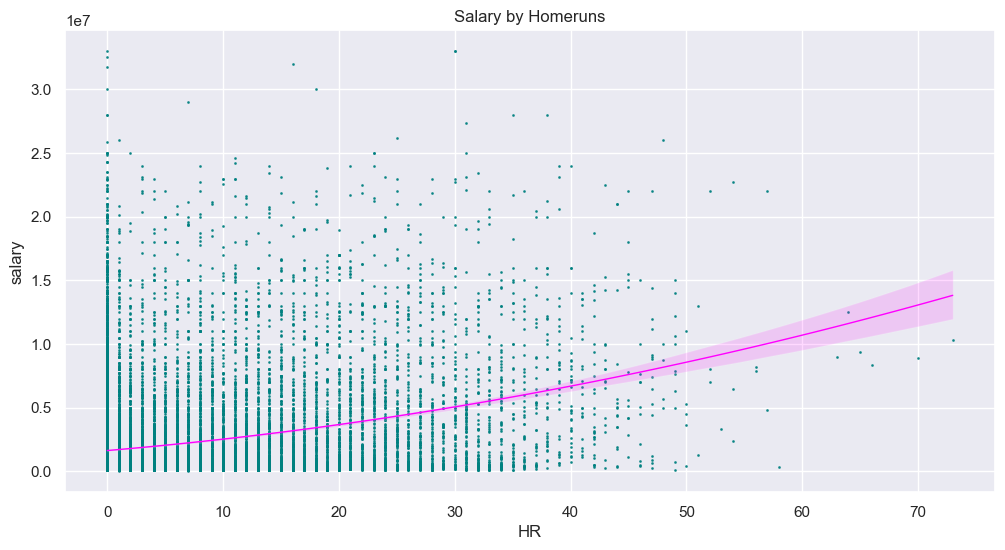

In [89]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.regplot(x='HR',y='salary',data=homeruns_salaries, 
            scatter_kws={'s':1}, 
            line_kws={'lw': 1, 'color': 'magenta'},
            order=2, color='teal').set(title='Salary by Homeruns')
plt.show()

In [121]:
# 1.5 (BONUS) Find all birth year that appears in the people table consecutively at least three times.
pd.read_sql("""WITH cte 
                    AS (SELECT birthYear,
                    ROW_NUMBER() OVER (ORDER BY birthYear) - ROW_NUMBER() 
                    OVER (PARTITION BY birthYear ORDER BY birthYear) AS grp
                    FROM people)
                SELECT birthYear
                FROM cte
                GROUP BY grp, birthYear
                HAVING COUNT(*) >= 3""", conn).dropna()

,birthYear
1,1832.0
2,1838.0
3,1840.0
4,1841.0
5,1842.0
...,...
158,1995.0
159,1996.0
160,1997.0
161,1998.0
